<a href="https://colab.research.google.com/github/Mjcherono/Hypothyroid-case-prediction/blob/main/Nairobi_Hospital_Hypothyroidism_Patient_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Defining the Question

####a. Specifying the Question
######The Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focussed on Thyroid Patients.Using this data we are going to make predictions of wether a patient has Hypothyroid or is negative.

#### b.Defining the metric for success.
######The model will be able to be considered well performing if it is able to clearly classify and categorize the predictions to patient with hypothyroid or negative patients. We can set the minimum level of accuracy level to be 80% its a faily good accuracy target score.

####c.Understanding the context.
######Nairobi Hospital is among  the leading hospitals in Kenya that take care of a variety of patients including those with hypothyroidism. This study is meant to make it simpler for doctors to determine if patients they are treating are sick with hypothyroid or not.

####e.Data Relevance.
######Most columns in the dataset were relevant appart from the TBG and TBG measures that had so many invalid entries.

###Importing Data

In [860]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn import metrics


In [861]:
#importing data
hypothyroid = pd.read_csv('/content/hypothyroid.csv')

In [862]:
#checking on data
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [863]:
hypothyroid.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [864]:
hypothyroid.query_hypothyroid.unique()

array(['f', 't'], dtype=object)

In [865]:
hypothyroid.on_thyroxine.unique()

array(['f', 't'], dtype=object)

In [866]:
#data types
hypothyroid.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [867]:
#description
hypothyroid.describe

<bound method NDFrame.describe of            status age sex on_thyroxine  ... FTI_measured  FTI TBG_measured TBG
0     hypothyroid  72   M            f  ...            y   10            n   ?
1     hypothyroid  15   F            t  ...            y   17            n   ?
2     hypothyroid  24   M            f  ...            y    0            n   ?
3     hypothyroid  24   F            f  ...            y    6            n   ?
4     hypothyroid  77   M            f  ...            y   44            n   ?
...           ...  ..  ..          ...  ...          ...  ...          ...  ..
3158     negative  58   F            f  ...            y   95            n   ?
3159     negative  29   F            f  ...            y   98            n   ?
3160     negative  77   M            f  ...            y  104            n   ?
3161     negative  74   F            f  ...            y  137            n   ?
3162     negative  56   F            t  ...            y  143            n   ?

[3163 rows x 26 c

###Data Preprocessing.

In [868]:
hypothyroid.shape

(3163, 26)

In [869]:
#Dropping unnecessary columns

hypothyroid.drop(['TBG','TSH_measured','TBG_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured'],axis=1, inplace=True)


I dropped TBG,TSH_measured,TBG_measured,T3_measured,T3_measured,TT4_measured, T4U_measured,FTI_measured since it had so many invalid entries.

In [870]:
hypothyroid.head(3)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,30,0.60,15,1.48,10
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,145,1.70,19,1.13,17
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,0,0.20,4,1,0


######Changing datatypes

In [871]:
hypothyroid.status.value_counts()

negative       3012
hypothyroid     151
Name: status, dtype: int64

In [872]:
df1 = hypothyroid[((hypothyroid.age == '?') | ( hypothyroid.sex == '?')| ( hypothyroid.TSH == '?') | (hypothyroid.T3 == '?') | (hypothyroid.TT4 == '?') | (hypothyroid.T4U == '?') | (hypothyroid.FTI == '?'))].index
hypothyroid.drop(df1, inplace=True)

Dropped all the ? entries in the dataset.

In [873]:
#Changing datatypes to int and floats
hypothyroid['age'] = hypothyroid['age'].astype(int)
hypothyroid['TSH'] = hypothyroid['TSH'].astype(float)
hypothyroid['T3'] = hypothyroid['T3'].astype(float)
hypothyroid['TT4'] = hypothyroid['TT4'].astype(float)
hypothyroid['T4U'] = hypothyroid['T4U'].astype(float)
hypothyroid['FTI'] = hypothyroid['FTI'].astype(float)


Changed the data type of age column to integer and those of other columns to float

In [874]:
#Checking for ? in the dataset
exists = '?' in hypothyroid
print(exists)

False


The above line of code was used to heck if the '?' still exists in the dataset.

In [875]:
#Label Encoding Columns
from sklearn.preprocessing import LabelEncoder

label_object = {}
categorical_columns = ['sex', 'on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre']
for col in categorical_columns:
  labelencoder = LabelEncoder()
  labelencoder.fit(hypothyroid[col])
  hypothyroid[col] = labelencoder.fit_transform(hypothyroid[col])
  label_object[col] = labelencoder

Label Encodedall the other categorical columns

In [876]:
hypothyroid

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,hypothyroid,72,1,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0
1,hypothyroid,15,0,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0
2,hypothyroid,24,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0
3,hypothyroid,24,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0.4,6.0,1.04,6.0
4,hypothyroid,77,1,0,0,0,0,0,0,0,0,0,0,0,7.3,1.2,57.0,1.28,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,0,0,0,0,0,0,0,0,0,0,0,0,5.8,1.7,86.0,0.91,95.0
3159,negative,29,0,0,0,0,0,0,0,0,0,0,0,0,0.8,1.8,99.0,1.01,98.0
3160,negative,77,1,0,0,0,0,0,0,0,0,0,0,0,1.2,0.6,71.0,0.68,104.0
3161,negative,74,0,0,0,0,0,0,0,0,0,0,0,0,1.3,0.1,65.0,0.48,137.0


In [877]:
#checking for null values
hypothyroid.isnull().sum()
#hypothyroid.dropna()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
dtype: int64

There were no null values hence nothing to drop

In [878]:
#checking for duplicates
hypothyroid.duplicated().sum()
hypothyroid.drop_duplicates()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,hypothyroid,72,1,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0
1,hypothyroid,15,0,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0
2,hypothyroid,24,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0
3,hypothyroid,24,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0.4,6.0,1.04,6.0
4,hypothyroid,77,1,0,0,0,0,0,0,0,0,0,0,0,7.3,1.2,57.0,1.28,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,0,0,0,0,0,0,0,0,0,0,0,0,5.8,1.7,86.0,0.91,95.0
3159,negative,29,0,0,0,0,0,0,0,0,0,0,0,0,0.8,1.8,99.0,1.01,98.0
3160,negative,77,1,0,0,0,0,0,0,0,0,0,0,0,1.2,0.6,71.0,0.68,104.0
3161,negative,74,0,0,0,0,0,0,0,0,0,0,0,0,1.3,0.1,65.0,0.48,137.0


Checked for duplicates and dropped the fewthat were found.The dataset remains with 1946 rows.

###Exploratory Data Analysis

####Univariate Analysis.

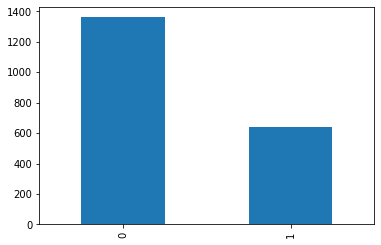

In [879]:
#Checking for sex counts

hypothyroid['sex'].value_counts().plot(kind='bar')

Most patients used for the study were males as shown by the bar chart above.

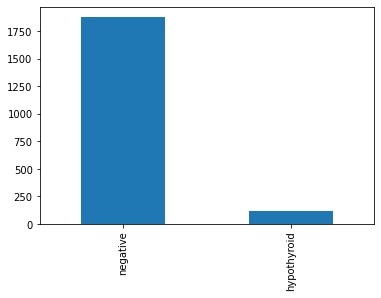

In [880]:
hypothyroid['status'].value_counts().plot(kind='bar')

The above visualization shows that most patient cases used for the were 'negative' patients/patients without thyroid they are represented by 0.The rest had hypothyroid.

In [881]:
hypothyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

In [882]:
hypothyroid.status.nunique()

2

In [883]:
#Distribution of age 

df = hypothyroid[['status','age']]
df[(df.status == 'negative')]

df1 = hypothyroid[['status','age']]
df1[(df1.status == 'hypothyroid')]


,status,age
0,hypothyroid,72
1,hypothyroid,15
2,hypothyroid,24
3,hypothyroid,24
4,hypothyroid,77
...,...,...
145,hypothyroid,60
146,hypothyroid,78
147,hypothyroid,69
149,hypothyroid,30


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age of patients who had hypothyroid')

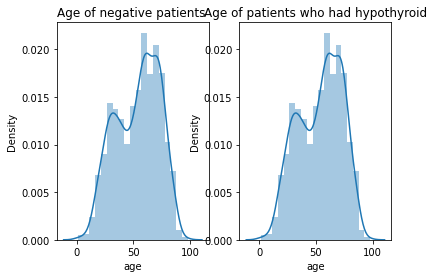

In [884]:
#Distribution of age of people who's status is Negative
#plot1
plt.subplot(1, 2, 1)
sns.distplot(df.age)
plt.title('Age of negative patients ')

#plot2
plt.subplot(1, 2, 2)
sns.distplot(df1.age)
plt.title('Age of patients who had hypothyroid')

####Bivariate Analysis

#####Multicollinearity

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6da3ca1550>,
      dtype=object)

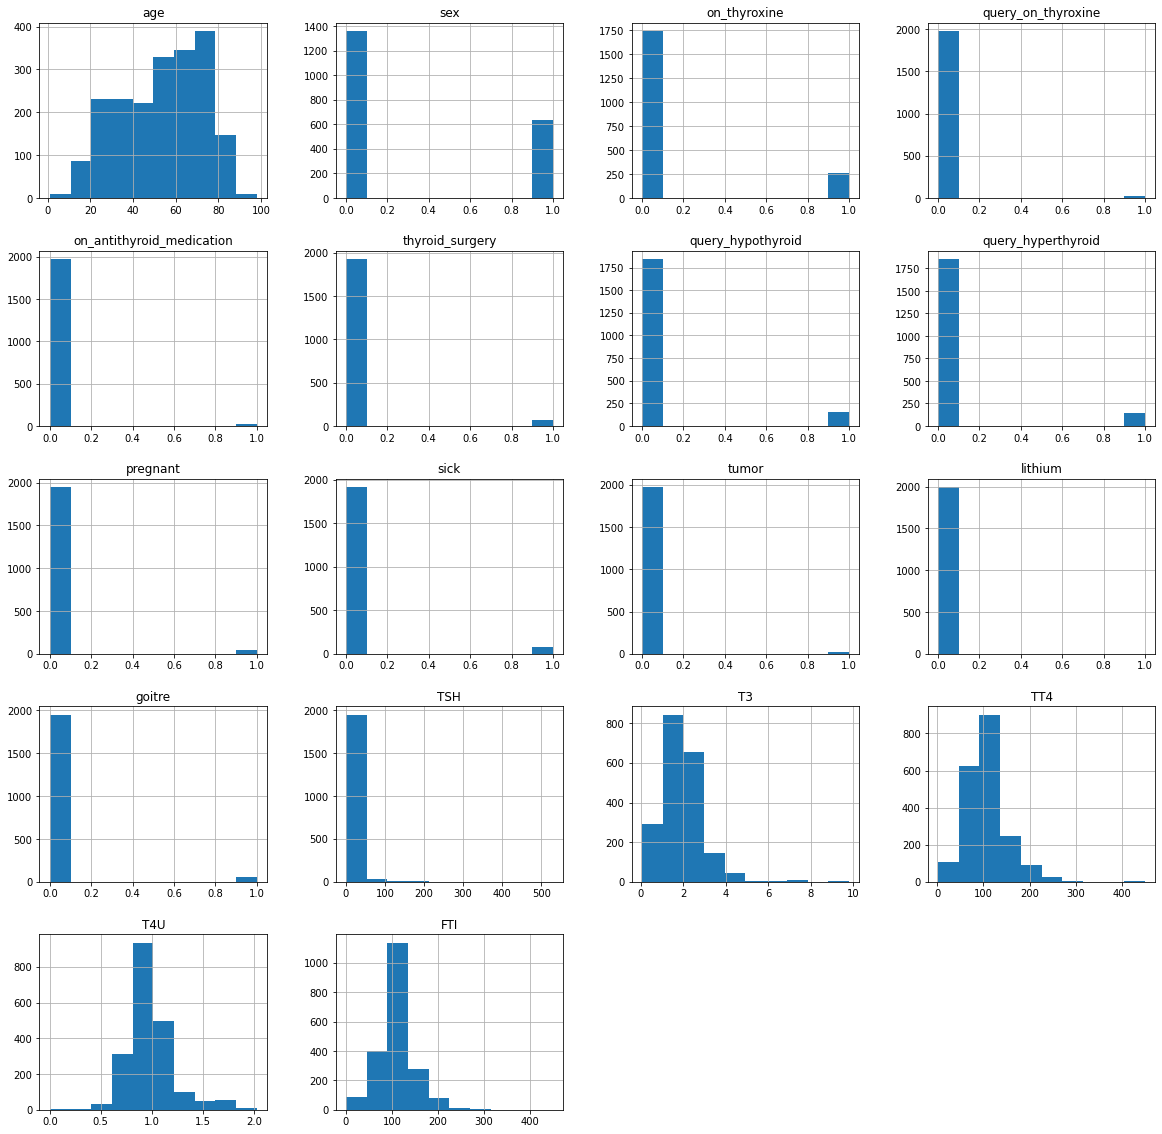

In [885]:
hypothyroid.hist(figsize = (20,20))


In [886]:
hypothyroid.dtypes

status                        object
age                            int64
sex                            int64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
dtype: object

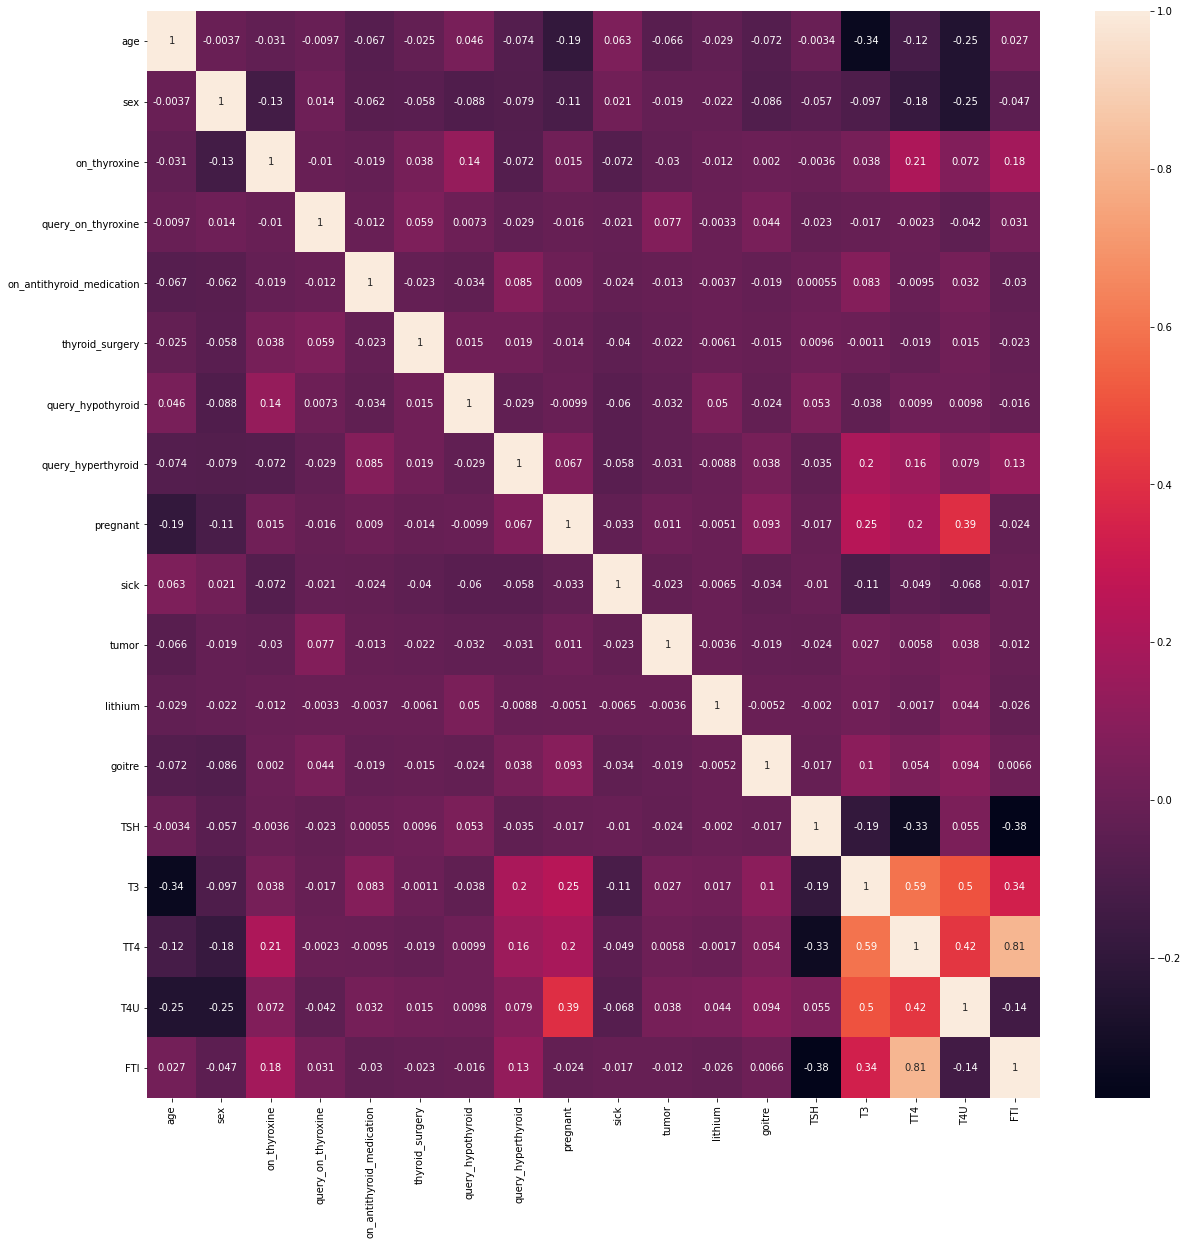

In [887]:
# Getting the correlations of the dataset
plt.subplots(figsize=(20,20))
sns.heatmap(hypothyroid.corr(),annot=True)

In [888]:
#heatmap
#pairplot
correlations = hypothyroid.corr()
correlations

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
age,1.000000,-0.003711,-0.030972,-0.009678,-0.067312,-0.024871,0.045694,-0.074038,-0.193525,0.062583,-0.065895,-0.028892,-0.071945,-0.003414,-0.344661,-0.123445,-0.249693,0.026850
sex,-0.003711,1.000000,-0.130928,0.013576,-0.061573,-0.057584,-0.088285,-0.078853,-0.109721,0.020555,-0.019182,-0.021679,-0.086347,-0.056956,-0.097376,-0.177993,-0.249017,-0.047062
on_thyroxine,-0.030972,-0.130928,1.000000,-0.010102,-0.018882,0.038433,0.137478,-0.071979,0.015337,-0.071671,-0.029635,-0.012122,0.002013,-0.003601,0.037829,0.210875,0.072485,0.177283
query_on_thyroxine,-0.009678,0.013576,-0.010102,1.000000,-0.012051,0.059088,0.007262,-0.028693,-0.016495,-0.021299,0.076713,-0.003259,0.044085,-0.022898,-0.017305,-0.002250,-0.041932,0.030740
on_antithyroid_medication,-0.067312,-0.061573,-0.018882,-0.012051,1.000000,-0.022606,-0.033669,0.084746,0.009019,-0.024188,-0.013161,-0.003701,-0.019301,0.000551,0.082733,-0.009509,0.032434,-0.029542
thyroid_surgery,-0.024871,-0.057584,0.038433,0.059088,-0.022606,1.000000,0.015066,0.018856,-0.013753,-0.039957,-0.021742,-0.006114,-0.015173,0.009550,-0.001087,-0.019027,0.014970,-0.022632
query_hypothyroid,0.045694,-0.088285,0.137478,0.007262,-0.033669,0.015066,1.000000,-0.029226,-0.009940,-0.059511,-0.032382,0.050411,-0.024062,0.053470,-0.038018,0.009908,0.009832,-0.015522
query_hyperthyroid,-0.074038,-0.078853,-0.071979,-0.028693,0.084746,0.018856,-0.029226,1.000000,0.066904,-0.057594,-0.031339,-0.008813,0.038345,-0.035411,0.200183,0.157951,0.079484,0.129400
pregnant,-0.193525,-0.109721,0.015337,-0.016495,0.009019,-0.013753,-0.009940,0.066904,1.000000,-0.033109,0.010809,-0.005066,0.093216,-0.016759,0.245750,0.195042,0.394950,-0.023529
sick,0.062583,0.020555,-0.071671,-0.021299,-0.024188,-0.039957,-0.059511,-0.057594,-0.033109,1.000000,-0.023263,-0.006542,-0.034114,-0.009997,-0.109648,-0.049137,-0.067527,-0.016917


In [889]:
hypothyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

Text(0.5, 1.0, 'Scatter plot of TSH against plot')

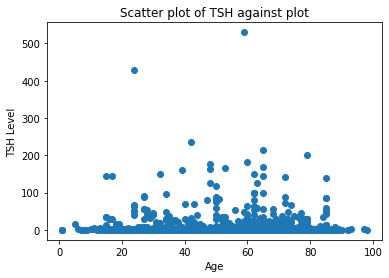

In [890]:
#scatter plot of thyroid stimulating hormone against AGE

plt.scatter(hypothyroid.age,hypothyroid.TSH)
plt.xlabel('Age')
plt.ylabel('TSH Level')
plt.title('Scatter plot of TSH against plot')

Thyroid Stimulation Hormone levels appears to be faily distributed among patients of all ages therefore we can't say that patients of a certain age are prone to over production of the hormone

Text(0.5, 1.0, 'Scatter plot of TSH against Triiodothyronine Levels')

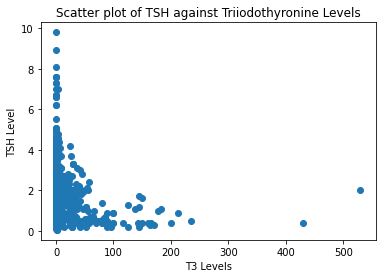

In [891]:
#scatter plot of thyroid stimulating hormone against T3

plt.scatter(hypothyroid.TSH,hypothyroid.T3)
plt.xlabel('T3 Levels')
plt.ylabel('TSH Level')
plt.title('Scatter plot of TSH against Triiodothyronine Levels')

The distribution implies that the TSH Level has little impact on the T3 test levels, as can be seen that TSH Levels are high where T3 levels are less.

Text(0.5, 1.0, 'Scatter plot of TSH against plot')

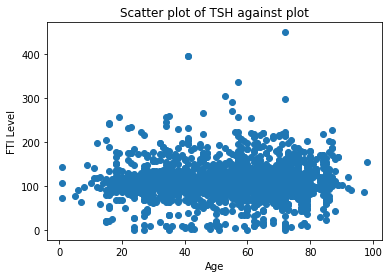

In [892]:
#scatter plot of thyroid stimulating hormone against AGE

plt.scatter(hypothyroid.age,hypothyroid.FTI)
plt.xlabel('Age')
plt.ylabel('FTI Level')
plt.title('Scatter plot of TSH against plot')

The observation above implies that most FTI Levels in most human beings range about the same level across all ages

###Implementing Soution.

####Decision Trees

######For feature selection I identified the independent and dependent(status) variables in the dataset then split the train and test to 80:20.

In [893]:
#Separating the dependent features from independent features

X = hypothyroid.drop('status',axis=1).values
y = np.where(hypothyroid['status']=='hypothyroid',0,1)

In [894]:
#Splitting to train and test
#Test size of 20%  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [895]:
#Training  decision tree model
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)


In [896]:
#making prediction
y_pred = forest.predict(X_test)

In [897]:
#Comparing Actual and Predicted
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
395,1,1
396,1,1
397,1,1
398,1,1


In [898]:
#assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.02
Mean Squared Error: 0.02
Root Mean Squared Error: 0.1414213562373095


In [899]:
#accuracy score
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.98


In [900]:
test_features = hypothyroid.columns.to_list()
test_features.remove('status')

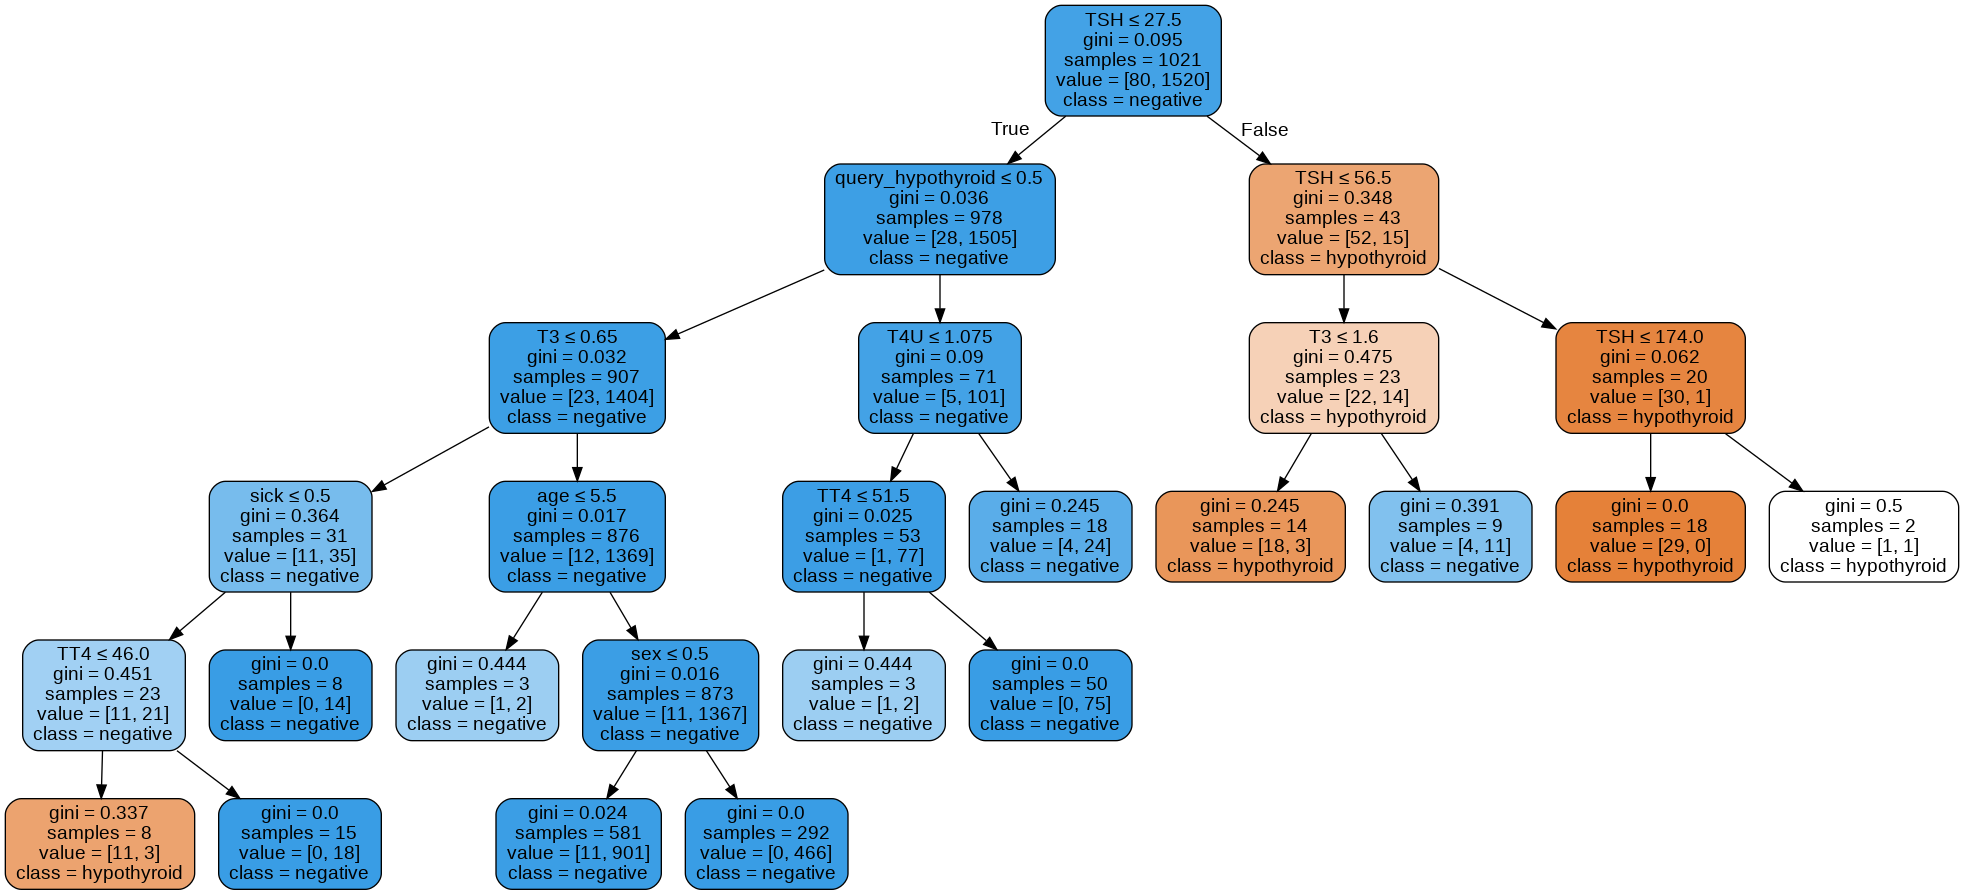

In [901]:
#Visualizing the Random forest

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['hypothyroid', 'negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroid_forest.png')
Image(graph.create_png())



The firstt test we perform is based on TSH levels.The dataset is split based on values of 27.5 and it is split to [80, 1520] .This means that in our current training dataset 80 patients had hypothyroid while 1520 were negative.Hence the root node has a class of hypothyroid.
Left children of the root node,the node has a class of negative that indicates that the left side of our random forest has a bias towards patients without hypothyroid.
The right children of our root node has a class of hypothyroid with values to match [52,15].

In [902]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];




[('age', 0.01), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.02), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH', 0.76), ('T3', 0.1), ('TT4', 0.1), ('T4U', 0.01), ('FTI', 0.0)]

Variable: TSH                  Importance: 0.76
Variable: T3                   Importance: 0.1
Variable: TT4                  Importance: 0.1
Variable: sick                 Importance: 0.02
Variable: age                  Importance: 0.01
Variable: T4U                  Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant   

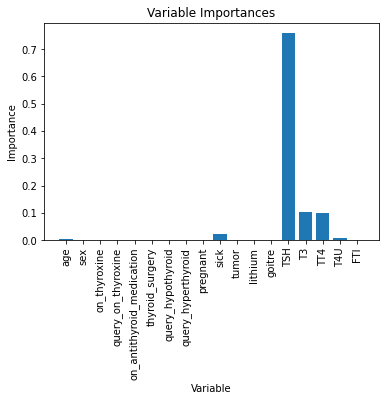

In [903]:
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


This implies that if we are trying to predict the status of a patient, we will only need these four variables;age,sick, TSH,TT4 and T4U.

###Ada boosted trees

We'll be using the same dependent and independent varriables for Adaboost classifier.

In [904]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#creating an adaboost classifier object
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=100, random_state=42)

#Train and predict
ada_boost = ada_boost.fit(X_train, y_train)
y_pred = ada_boost.predict(X_test)

In [905]:
#Comparing Actual with predicted

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
395,1,1
396,1,1
397,1,1
398,1,1


In [906]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.99


In [907]:
#Test features
test_features = hypothyroid.columns.to_list()
test_features.remove('status')

In [908]:
hypothyroid.shape

(2000, 19)

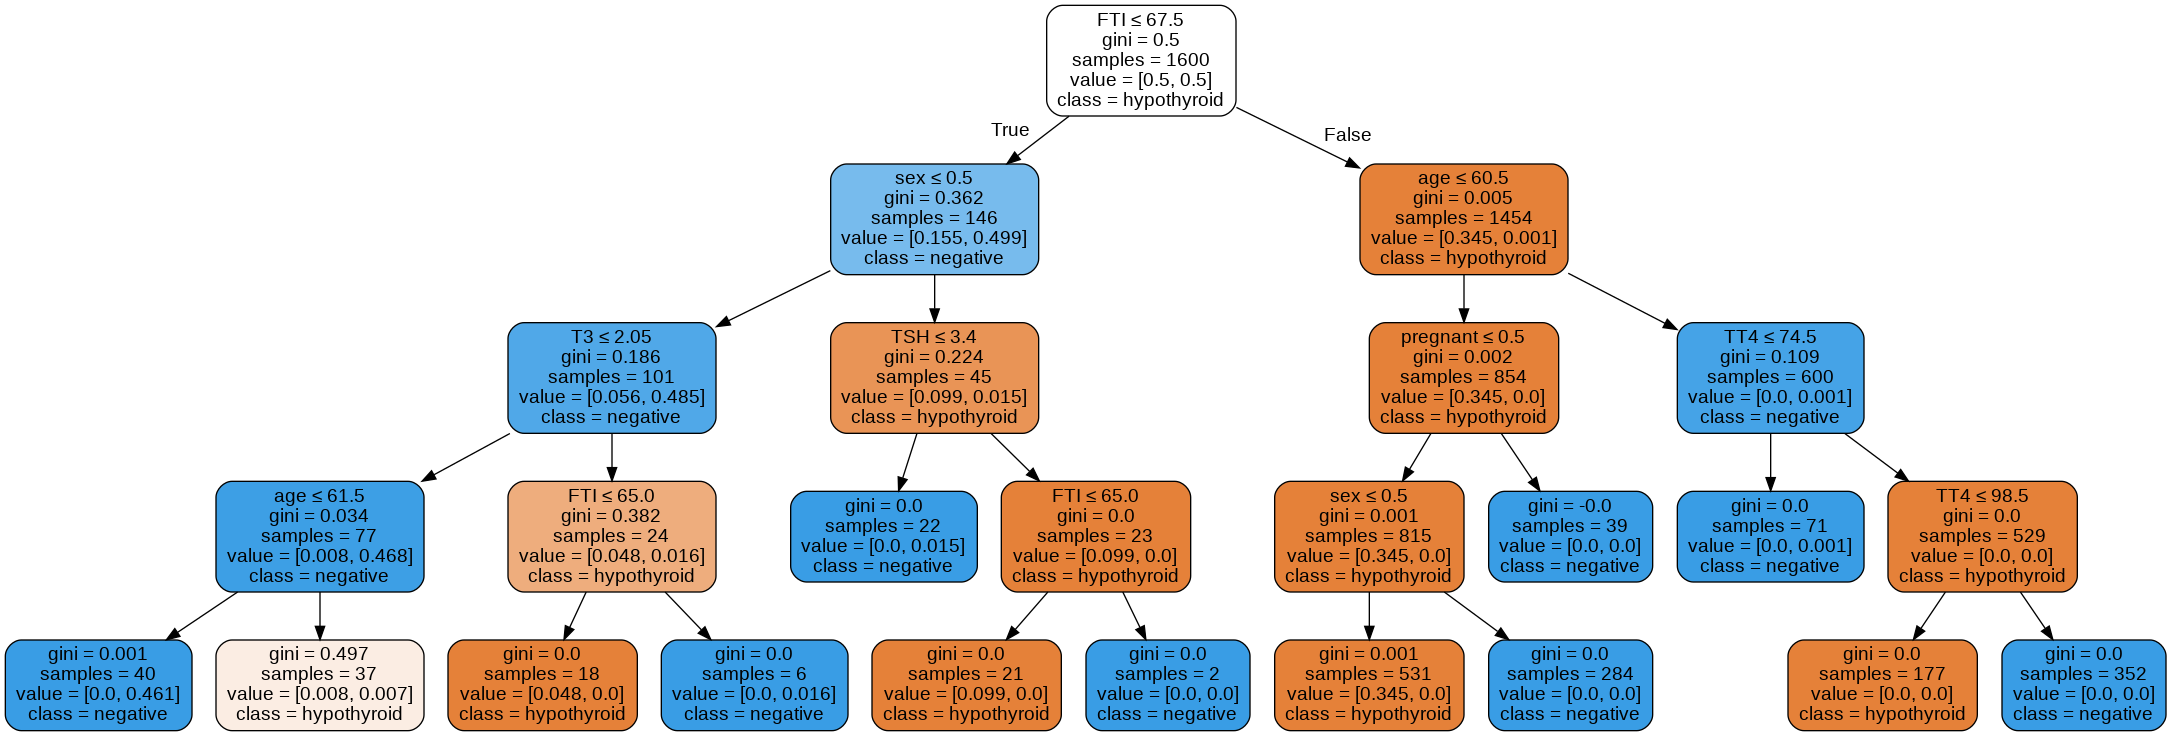

In [909]:
#Visualizing the ada boost classifier

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = ada_boost.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['hypothyroid', 'negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroid_adaboost.png')
Image(graph.create_png())

In [910]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


[('age', 0.02), ('sex', 0.23), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH', 0.05), ('T3', 0.12), ('TT4', 0.0), ('T4U', 0.0), ('FTI', 0.58)]

Variable: FTI                  Importance: 0.58
Variable: sex                  Importance: 0.23
Variable: T3                   Importance: 0.12
Variable: TSH                  Importance: 0.05
Variable: age                  Importance: 0.02
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor    

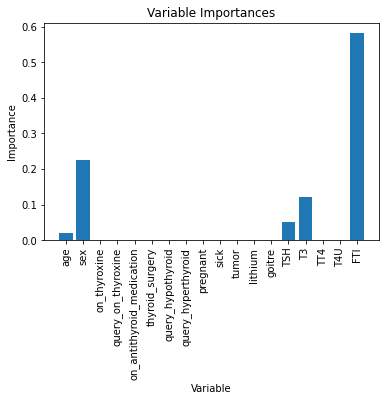

In [911]:
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


Obsevations.

Adaboost;
Gives an accuracy of 99% with proves to be accurate to use for predictions.

The tree generated is divided by age.

And Adaboost proves that the best variables for T3,TSH,T3,FTI and age


####Gradient Boosting Classifier

The independent and dependent features were retained.

In [912]:
from sklearn.ensemble import GradientBoostingClassifier

#set a target number of trees
target_number_of_trees = 100

#create an object of gbr
gbr = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.1, max_depth=4,random_state=42)

#Train gbr
gbr = gbr.fit(X_train, y_train)

#Make predictions
y_pred_gbr = gbr.predict(X_test)

In [913]:
#Comparing Actual with predicted

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
395,1,1
396,1,1
397,1,1
398,1,1


In [914]:

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.99


In [915]:
#Test features
test_features = hypothyroid.columns.to_list()
test_features.remove('status')

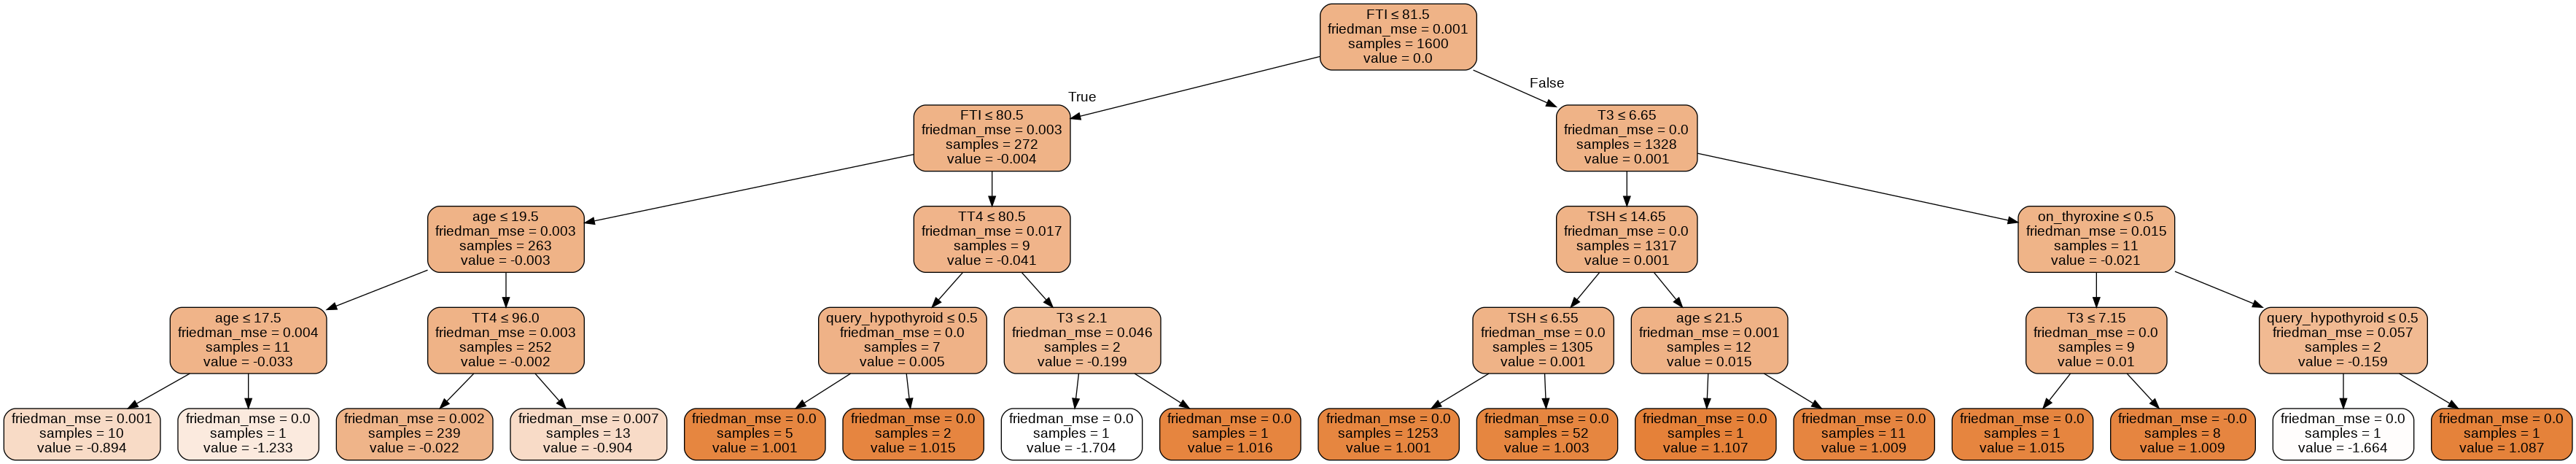

In [916]:
#Visualizing the ada boost classifier

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = gbr.estimators_[50,0]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['hypothyroid', 'negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroid_gbr.png')
Image(graph.create_png())

In [917]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


[('age', 0.11), ('sex', 0.0), ('on_thyroxine', 0.12), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.29), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH', 0.01), ('T3', 0.25), ('TT4', 0.18), ('T4U', 0.0), ('FTI', 0.05)]

Variable: query_hypothyroid    Importance: 0.29
Variable: T3                   Importance: 0.25
Variable: TT4                  Importance: 0.18
Variable: on_thyroxine         Importance: 0.12
Variable: age                  Importance: 0.11
Variable: FTI                  Importance: 0.05
Variable: TSH                  Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick 

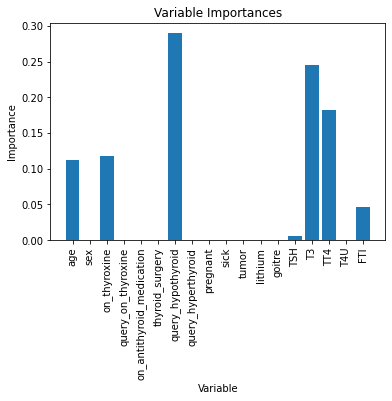

In [918]:
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


Gradient boosting Classifier ;

Gives an equal 99% of accuracy.

Tree generated is split using FTI.

It shows that the most important features to predict for patient status are age,on_thyroxine, query_hypothyroid, TSH,T3,TT4,T4U and FTI.


###Solution using Support Vector Machine

In [919]:
hypothyroid.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
dtype: int64

In [920]:
hypothyroid.dtypes

status                        object
age                            int64
sex                            int64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
dtype: object

In [921]:
hypothyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

####1.Kernel = 'Linear'

In [922]:
#separating features from label

X = hypothyroid[['FTI','TT4']]
y = hypothyroid['status']

#  Split the data into train and test set
y = y.astype('category')
y = y.cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Instance of svm model 
linsvc = SVC(kernel = 'linear')

# Train the model using the training set
linsvc.fit(X_train,y_train)

# Predict the response for the test set
y_pred = linsvc.predict(X_test)
print(y_pred)

# Checking the accurancy of the model
model_accuracy = accuracy_score(y_test,y_pred)
model_accuracy


[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


0.9775

####2.Kernel = 'Poly'

In [923]:
hypothyroid.dtypes

status                        object
age                            int64
sex                            int64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
dtype: object

In [924]:
#separating features from label

X = hypothyroid[['FTI','TT4']]
y = hypothyroid['status']

#  Split the data into train and test set
y = y.astype('category')
y = y.cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Creating an instance of the model
from sklearn.svm import SVC

poly_classifier = SVC(kernel = 'poly',degree=3)

# Train the model using the training set
poly_classifier.fit(X_train,y_train)

# Predict the response for the test set
#
y_pred = poly_classifier.predict(X_test)
print(y_pred)

# Model Evaluation
print( accuracy_score(y_test, y_pred))

[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0.9825


####3. Radial Basis Function '**rbf**'

In [925]:
#separating features from label
X = hypothyroid[['FTI','TT4']]
y = hypothyroid['status']

#  Split the data into train and test set
y = y.astype('category')
y = y.cat.codes


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Building and training model 
rbf = SVC(kernel='rbf')

# Train the model using the training set
rbf.fit(X_train, y_train)

# y prediction
y_pred = rbf.predict(X_test)
print(y_pred)

# Model Evaluation
print( accuracy_score(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))


[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0.9825


####Repeating rbf with different parameters

In [926]:
#separating features from label
X = hypothyroid.drop('status', axis=1)
y = hypothyroid['status']

#  Split the data into train and test set
y = y.astype('category')
y = y.cat.codes

# Applying the reduction algorithm: PCA
pca = PCA(n_components=10).fit(X)
X = pca.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Building and training model 
rbf = SVC(kernel='rbf',C=3.0, degree=6,gamma='scale')

# Train the model using the training set
rbf.fit(X_train, y_train)

# y prediction
y_pred = rbf.predict(X_test)
y_pred

# Model Evaluation
print( accuracy_score(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))


0.9825


######Among the three functions;Polynomial,linear and rbf it appears that  rbf and polynomial has the highest accuracy score(98.25%).
######I then parameter tuned the rbf function then checked if performance increases unfortunately it didn't.
######For the parameters I changed penalty C from default 1 to 3 and degrees to 6 and used 10 of the features provided.

####Challenging the solution

Tried the same problem using a sigmoid function to see if there is any change.

####Sigmoid function

In [927]:
#separating features from label

X = hypothyroid[['FTI','TT4']]
y = hypothyroid['status']

#  Split the data into train and test set
y = y.astype('category')
y = y.cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Building and training the model 
sigclassifier = SVC(kernel='sigmoid')

#fitting model to train set
sigclassifier.fit(X_train, y_train)

# making prediction
y_pred = sigclassifier.predict(X_test)

# Model Evaluation
print( accuracy_score(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))

0.91


######Tried challenging the solution I had using the sigmoid function but apparently sigmoid function performs less than poly,linear and rbf.To make better predictions in the hypothyroid case study, rbf should be used for svm model This way accuracies for predictions will be higher.

######The dataset need to be less biased i.e most entries for the status column were negative so the model is less exposed to hypothyroid cases during training.